In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to load
mouse_drug_data = "Resources/mouse_drug_data.csv"
clinicaltrial_data = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinicaltrial Data

mouse_drug_df = pd.read_csv(mouse_drug_data)
clinicaltrial_df = pd.read_csv(clinicaltrial_data)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_drug_df, clinicaltrial_df, on="Mouse ID", how="inner")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [5]:
# Tumor Response to Treatment
# Store the mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_volume_mean = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_volume_mean_df = pd.DataFrame(tumor_volume_mean)
# Preview DataFrame
tumor_volume_mean_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [6]:
# Store the Standard Error of Tumor Volume Grouped by Drug and Timepoint
tumor_volume_std_error = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame

tumor_volume_std_error_df = pd.DataFrame(tumor_volume_std_error)

# Preview DataFrame
tumor_volume_std_error_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [7]:
# Minor Data Munging to Re-Format the DataFrame

tumor_volume_data_munging = pd.pivot_table(combined_df, index=["Timepoint"], columns=["Drug"])["Tumor Volume (mm3)"]

# Preview the Reformatted work

tumor_volume_data_munging

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


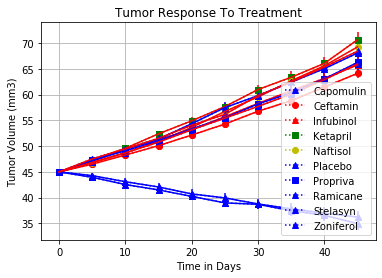

In [56]:
# Generate the plot(with Error Bars)
# calculate means and std errors on means

capomulin = tumor_volume_data_munging[["Capomulin"]]
capomulin_to_list = capomulin['Capomulin'].tolist()
capomulin_sem = tumor_volume_std_error[["Capomulin"]]
capomulin_to_list_sem = capomulin_sem ['Capomulin'].tolist()

ceftamin = tumor_volume_data_munging[["Ceftamin"]]
ceftamin_to_list = ceftamin['Ceftamin'].tolist()
ceftamin_sem = tumor_volume_std_error[["Ceftamin"]]
ceftamin_to_list_sem = ceftamin_sem ['Ceftamin'].tolist()

infubinol = tumor_volume_data_munging[["Infubinol"]]
infubinol_to_list = infubinol['Infubinol'].tolist()
infubinol_sem = tumor_volume_std_error[["Infubinol"]]
infubinol_to_list_sem = infubinol_sem ['Infubinol'].tolist()

ketapril = tumor_volume_data_munging[["Ketapril"]]
ketapril_to_list = ketapril['Ketapril'].tolist()
ketapril_sem = tumor_volume_std_error[["Ketapril"]]
ketapril_to_list_sem = ketapril_sem ['Ketapril'].tolist()

naftisol = tumor_volume_data_munging[["Naftisol"]]
naftisol_to_list = naftisol['Naftisol'].tolist()
naftisol_sem = tumor_volume_std_error[["Naftisol"]]
naftisol_to_list_sem = naftisol_sem ["Naftisol"].tolist()

placebo = tumor_volume_data_munging[["Placebo"]]
placebo_to_list = placebo["Placebo"].tolist()
placebo_sem = tumor_volume_std_error[["Placebo"]]
placebo_to_list_sem = placebo_sem ["Placebo"].tolist()

propriva = tumor_volume_data_munging[["Propriva"]]
propriva_to_list = propriva["Propriva"].tolist()
propriva_sem = tumor_volume_std_error[["Propriva"]]
propriva_to_list_sem = propriva_sem ["Propriva"].tolist()

ramicane = tumor_volume_data_munging[["Ramicane"]]
ramicane_to_list = ramicane["Ramicane"].tolist()
ramicane_sem = tumor_volume_std_error[["Ramicane"]]
ramicane_to_list_sem = ramicane_sem ["Ramicane"].tolist()

stelasyn = tumor_volume_data_munging[["Stelasyn"]]
stelasyn_to_list = stelasyn["Stelasyn"].tolist()
stelasyn_sem = tumor_volume_std_error[["Stelasyn"]]
stelasyn_to_list_sem = stelasyn_sem ["Stelasyn"].tolist()

zoniferol = tumor_volume_data_munging[["Zoniferol"]]
zoniferol_to_list = zoniferol["Zoniferol"].tolist()
zoniferol_sem = tumor_volume_std_error[["Zoniferol"]]
zoniferol_to_list_sem = zoniferol_sem ["Zoniferol"].tolist()

# plot means with error bars

x_limit = 50
x_axis = np.arange(0, x_limit, 5)

plt.scatter(x_axis, capomulin_to_list, marker="^", color="blue")
plt.plot(x_axis, capomulin_to_list, "b:^", label='Capomulin')
plt.errorbar(x_axis, capomulin_to_list, yerr=capomulin_to_list_sem, color="blue")

plt.scatter(x_axis, ceftamin_to_list, marker='o', color='red')
plt.plot(x_axis, ceftamin_to_list, 'r:o', label='Ceftamin')
plt.errorbar(x_axis, ceftamin_to_list, yerr=ceftamin_to_list_sem, color='red')

plt.scatter(x_axis, infubinol_to_list, marker='^', color='red')
plt.plot(x_axis, infubinol_to_list, 'r:^', label='Infubinol')
plt.errorbar(x_axis, infubinol_to_list, yerr=infubinol_to_list_sem, color='red')

plt.scatter(x_axis, ketapril_to_list, marker='s', color='green')
plt.plot(x_axis,ketapril_to_list, 'g:s', label='Ketapril')
plt.errorbar(x_axis, ketapril_to_list, yerr=ketapril_to_list_sem, color='red')

plt.scatter(x_axis, naftisol_to_list, marker='o', color='yellow')
plt.plot(x_axis, naftisol_to_list, 'y:o', label='Naftisol')
plt.errorbar(x_axis, naftisol_to_list, yerr=naftisol_to_list_sem, color='red')

plt.scatter(x_axis, placebo_to_list, marker="^", color="blue")
plt.plot(x_axis, placebo_to_list, "b:^", label='Placebo')
plt.errorbar(x_axis, placebo_to_list, yerr=placebo_to_list_sem, color="blue")

plt.scatter(x_axis, propriva_to_list, marker="^", color="blue")
plt.plot(x_axis, propriva_to_list, "b:s", label='Propriva')
plt.errorbar(x_axis, propriva_to_list, yerr=propriva_to_list_sem, color="blue")

plt.scatter(x_axis, ramicane_to_list, marker="^", color="blue")
plt.plot(x_axis, ramicane_to_list, "b:^", label='Ramicane')
plt.errorbar(x_axis, ramicane_to_list, yerr=ramicane_to_list_sem, color="blue")

plt.scatter(x_axis, stelasyn_to_list, marker='^', color='blue')
plt.plot(x_axis, stelasyn_to_list, 'b:^', label='Stelasyn')
plt.errorbar(x_axis, stelasyn_to_list, yerr=stelasyn_to_list_sem, color='red')

plt.scatter(x_axis, zoniferol_to_list, marker='^', color='blue')
plt.plot(x_axis, zoniferol_to_list, 'b:^', label='Zoniferol')
plt.errorbar(x_axis, zoniferol_to_list, yerr=zoniferol_to_list_sem, color='red')

plt.title("Tumor Response To Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid()

# Save the Figure
plt.savefig("Images/tumor-response-to-treatment.png")
# Show the Figure
plt.show()

In [9]:
# Metastatic Response to Treatment
# Store the Mean Met. Site Data Grouped by Drug and Timepoint

mean_met_site= combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame

mean_met_site_df = pd.DataFrame(mean_met_site)
# Preview DataFrame

mean_met_site_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_site_std_error = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
met_site_std_error_df = pd.DataFrame(met_site_std_error)

# Preview DataFrame

met_site_std_error_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_site_data_munging = pd.pivot_table(combined_df, index=["Timepoint"], columns=["Drug"])["Tumor Volume (mm3)"]

# Preview that Reformatting worked

met_site_data_munging

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


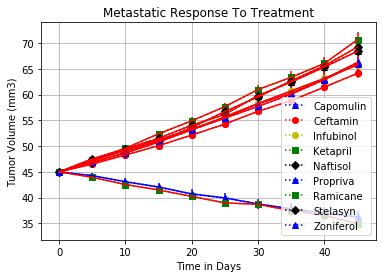

In [78]:
# Generate the plot with error bars
capomulin_metastatic = met_site_data_munging[["Capomulin"]]
capomulin_metastatic_list = capomulin_metastatic['Capomulin'].tolist()
capomulin_metastatic_sem = tumor_volume_std_error[["Capomulin"]]
capomulin_metastatic_list_sem = capomulin_metastatic_sem ['Capomulin'].tolist()

ceftamin_metastatic = met_site_data_munging[["Ceftamin"]]
ceftamin_metastatic_list = ceftamin_metastatic['Ceftamin'].tolist()
ceftamin_metastatic_sem = tumor_volume_std_error[["Ceftamin"]]
ceftamin_metastatic_list_sem = ceftamin_metastatic_sem ['Ceftamin'].tolist()

infubinol_metastatic = met_site_data_munging[["Infubinol"]]
infubinol_metastatic_list = infubinol_metastatic['Infubinol'].tolist()
infubinol_metastatic_sem = tumor_volume_std_error[["Infubinol"]]
infubinol_metastatic_list_sem = infubinol_metastatic_sem ['Infubinol'].tolist()

ketapril_metastatic = met_site_data_munging[["Ketapril"]]
ketapril_metastatic_list = ketapril_metastatic['Ketapril'].tolist()
ketapril_metastatic_sem = tumor_volume_std_error[["Ketapril"]]
ketapril_metastatic_list_sem = ketapril_metastatic_sem ['Ketapril'].tolist()

naftisol_metastatic = met_site_data_munging[["Naftisol"]]
naftisol_metastatic_list = naftisol_metastatic['Naftisol'].tolist()
naftisol_metastatic_sem = tumor_volume_std_error[["Naftisol"]]
naftisol_metastatic_list_sem = naftisol_metastatic_sem ["Naftisol"].tolist()

placebo_metastatic= met_site_data_munging[["Placebo"]]
placebo_metastatic_list = placebo_metastatic["Placebo"].tolist()
placebo_metastatic_sem = tumor_volume_std_error[["Placebo"]]
placebo_metastatic_list_sem = placebo_metastatic_sem ["Placebo"].tolist()

propriva_metastatic= met_site_data_munging[["Propriva"]]
propriva_metastatic_list = propriva_metastatic["Propriva"].tolist()
propriva_metastatic_sem = tumor_volume_std_error[["Propriva"]]
propriva_metastatic_list_sem = propriva_metastatic_sem ["Propriva"].tolist()

ramicane_metastatic= met_site_data_munging[["Ramicane"]]
ramicane_metastatic_list = ramicane_metastatic["Ramicane"].tolist()
ramicane_metastatic_sem = tumor_volume_std_error[["Ramicane"]]
ramicane_metastatic_list_sem = ramicane_metastatic_sem ["Ramicane"].tolist()

stelasyn_metastatic= met_site_data_munging[["Stelasyn"]]
stelasyn_metastatic_list = stelasyn_metastatic["Stelasyn"].tolist()
stelasyn_metastatic_sem = tumor_volume_std_error[["Stelasyn"]]
stelasyn_metastatic_list_sem = stelasyn_metastatic_sem ["Stelasyn"].tolist()

zoniferol_metastatic= met_site_data_munging[["Zoniferol"]]
zoniferol_metastatic_list = zoniferol_metastatic["Zoniferol"].tolist()
zoniferol_metastatic_sem = tumor_volume_std_error[["Zoniferol"]]
zoniferol_metastatic_list_sem = zoniferol_metastatic_sem ["Zoniferol"].tolist()

# plot the data in a scatter plot

x_limit = 50
x_axis = np.arange(0, x_limit, 5)

plt.scatter(x_axis, capomulin_metastatic_list, marker="^", color="blue")
plt.plot(x_axis, capomulin_metastatic_list, "b:^", label='Capomulin')
plt.errorbar(x_axis, capomulin_metastatic_list, yerr=capomulin_metastatic_list_sem, color="blue")

plt.scatter(x_axis, ceftamin_metastatic_list, marker='o', color='red')
plt.plot(x_axis, ceftamin_metastatic_list, 'r:o', label='Ceftamin')
plt.errorbar(x_axis, ceftamin_metastatic_list, yerr=ceftamin_metastatic_list_sem, color='red')

plt.scatter(x_axis, infubinol_metastatic_list, marker='o', color='yellow')
plt.plot(x_axis, infubinol_metastatic_list, 'y:o', label='Infubinol')
plt.errorbar(x_axis, infubinol_metastatic_list, yerr=infubinol_metastatic_list_sem, color='red')

plt.scatter(x_axis, ketapril_metastatic_list, marker='s', color='green')
plt.plot(x_axis,ketapril_metastatic_list, 'g:s', label='Ketapril')
plt.errorbar(x_axis, ketapril_metastatic_list, yerr=ketapril_metastatic_list_sem, color='red')

plt.scatter(x_axis, naftisol_metastatic_list, marker='o', color='black')
plt.plot(x_axis, naftisol_metastatic_list, 'k:D', label='Naftisol')
plt.errorbar(x_axis, naftisol_metastatic_list, yerr=naftisol_metastatic_list_sem, color='red')

plt.scatter(x_axis, propriva_metastatic_list, marker='^', color='blue')
plt.plot(x_axis, propriva_metastatic_list, 'b:^', label='Propriva')
plt.errorbar(x_axis, propriva_metastatic_list, yerr=propriva_metastatic_list_sem, color="red")

plt.scatter(x_axis, ramicane_metastatic_list, marker='^', color='green')
plt.plot(x_axis, ramicane_metastatic_list, 'g:s', label='Ramicane')
plt.errorbar(x_axis, ramicane_metastatic_list, yerr=ramicane_metastatic_list_sem, color="red")

plt.scatter(x_axis, stelasyn_metastatic_list, marker='^', color='black')
plt.plot(x_axis, stelasyn_metastatic_list, 'k:D', label='Stelasyn')
plt.errorbar(x_axis, stelasyn_metastatic_list, yerr=stelasyn_metastatic_list_sem, color='red')

plt.scatter(x_axis, zoniferol_metastatic_list, marker='^', color='blue')
plt.plot(x_axis, zoniferol_metastatic_list, 'b:^', label='Zoniferol')
plt.errorbar(x_axis, zoniferol_metastatic_list, yerr=zoniferol_metastatic_list_sem, color="red")

plt.title("Metastatic Response To Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid()

# Save the Figure
plt.savefig("Images/metastatic_response-to-treatment.png")
# Show the Figure
plt.show()

In [65]:
# Survival Rates
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_count = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)

# Preview DataFrame

mice_count_df

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [66]:
# Minor Data Munging to Re-Format the Data Frames

mice_count_data_munging = pd.pivot_table(mice_count_df, index=["Timepoint"], columns=["Drug"])["Mouse ID"]

# Preview the Data Frame
mice_count_data_munging

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [67]:
mice_survival_pct = mice_count_data_munging

cols = list(mice_survival_pct.columns)
for i in range(len(cols)):
    mice_survival_pct[cols[i]] = mice_survival_pct[cols[i]]*100 / mice_survival_pct.iloc[0,i]
mice_survival_pct

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


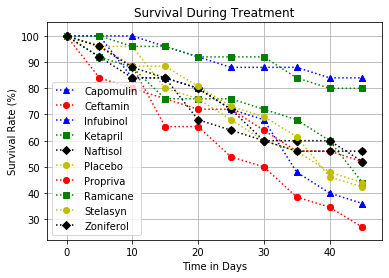

In [70]:
# Generate the Plot (Accounting for percentages)


capomulin_mice_count = mice_survival_pct[["Capomulin"]]
capomulin_mice_count_list = capomulin_mice_count['Capomulin'].tolist()

ceftamin_mice_count = mice_survival_pct[["Ceftamin"]]
ceftamin_mice_count_list = ceftamin_mice_count['Ceftamin'].tolist()

infubinol_mice_count = mice_survival_pct[["Infubinol"]]
infubinol_mice_count_list = infubinol_mice_count['Infubinol'].tolist()

ketapril_mice_count = mice_survival_pct[["Ketapril"]]
ketapril_mice_count_list = ketapril_mice_count['Ketapril'].tolist()

naftisol_mice_count = mice_survival_pct[["Naftisol"]]
naftisol_mice_count_list = naftisol_mice_count['Naftisol'].tolist()

placebo_mice_count = mice_survival_pct[["Placebo"]]
placebo_mice_count_list = placebo_mice_count['Placebo'].tolist()

propriva_mice_count = mice_survival_pct[["Propriva"]]
propriva_mice_count_list = propriva_mice_count['Propriva'].tolist()

ramicane_mice_count = mice_survival_pct[["Ramicane"]]
ramicane_mice_count_list = ramicane_mice_count['Ramicane'].tolist()

stelasyn_mice_count = mice_survival_pct[["Stelasyn"]]
stelasyn_mice_count_list = stelasyn_mice_count['Stelasyn'].tolist()

zoniferol_mice_count = mice_survival_pct[["Zoniferol"]]
zoniferol_mice_count_list = zoniferol_mice_count["Zoniferol"].tolist()


x_limit = 50
x_axis = np.arange(0, x_limit, 5)

plt.scatter(x_axis, capomulin_mice_count_list, marker='^', color='blue')
plt.plot(x_axis, capomulin_mice_count_list, 'b:^', label='Capomulin')

plt.scatter(x_axis, ceftamin_mice_count_list, marker='o', color='red')
plt.plot(x_axis, ceftamin_mice_count_list, 'r:o', label='Ceftamin')

plt.scatter(x_axis, infubinol_mice_count_list, marker='^', color='blue')
plt.plot(x_axis, infubinol_mice_count_list, 'b:^', label='Infubinol')

plt.scatter(x_axis, ketapril_mice_count_list, marker='s', color='green')
plt.plot(x_axis, ketapril_mice_count_list, 'g:s', label='Ketapril')

plt.scatter(x_axis, naftisol_mice_count_list, marker='D', color='black')
plt.plot(x_axis, naftisol_mice_count_list, 'k:D', label='Naftisol')

plt.scatter(x_axis, placebo_mice_count_list, marker='o', color='yellow')
plt.plot(x_axis, placebo_mice_count_list, 'y:o', label='Placebo')

plt.scatter(x_axis, propriva_mice_count_list, marker='o', color='red')
plt.plot(x_axis, propriva_mice_count_list, 'r:o', label='Propriva')

plt.scatter(x_axis, ramicane_mice_count_list, marker='o', color='green')
plt.plot(x_axis, ramicane_mice_count_list, 'g:s', label='Ramicane')

plt.scatter(x_axis, stelasyn_mice_count_list, marker='o', color='yellow')
plt.plot(x_axis, stelasyn_mice_count_list, 'y:o', label='Stelasyn')

plt.scatter(x_axis, zoniferol_mice_count_list, marker='o', color='black')
plt.plot(x_axis, zoniferol_mice_count_list, 'k:D', label='Zoniferol')

plt.title("Survival During Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Survival Rate (%)')
plt.grid()
plt.legend()

# Save the Figure
plt.savefig('Images/survival-during-treatment.png')

# Show the Figure
plt.show()



In [60]:
# Summary Bar graph
# Calculate the percent changes for each drug

pct_change_by_drug = (tumor_volume_data_munging.iloc[-1] / tumor_volume_data_munging.iloc[0] -1)*100

pct_change_by_drug


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

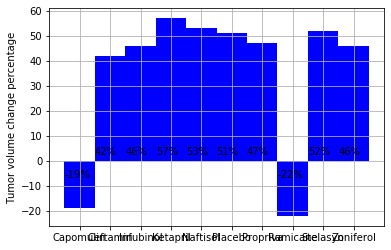

In [76]:
# Store all Relevant Percent Changes into a Tuple

pct_change_by_drug_tuple = tuple([i for i in pct_change_by_drug.values])

pct_change_by_drug_tuple
# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 

xdrug_names = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

x_axis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
hieght = [int(pct_change_by_drug[x]) for x in xdrug_names]

text_xloc=[x-0.5 for x in x_axis]
text_yloc=[2.5 if x >0 else (-6.5) for x in hieght]
text=[f"{x}%" for x in hieght]

plt.bar(x_axis, hieght, width=-1, color="b", align="center")

# Use functions to label the percentages of changes
plt.xticks(x_axis, xdrug_names)
plt.ylabel("Tumor volume change percentage")

for i in range(len(text)):
    plt.text(text_xloc[i], text_yloc[i], text[i])
    
plt.grid()

# Save the Figure

plt.savefig("Images\Summary Bar graph.png")

# Show the figure

plt.show()

